# World Happiness Report Project

Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.  
    The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.  
    The Dystopia Residual is already provided in the dataset  
    If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.  

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os

In [4]:
df = pd.read_csv(os.path.join('happiness_score_dataset.csv'))

In [5]:
df.count()

Country                          158
Region                           158
Happiness Rank                   158
Happiness Score                  158
Standard Error                   158
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         158
Freedom                          158
Trust (Government Corruption)    158
Generosity                       158
Dystopia Residual                158
dtype: int64

In [6]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
df.isnull()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#mean, minimum and maximum value for each column containing numerical data
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [11]:
#List the 10 happiest countries
list_Ten_Happiest = df.sort_values(by = 'Happiness Rank')
list_Ten_Happiest.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [12]:
#10 List the 10 least happy countries
list_Ten_LeastHappy = df.sort_values(by = 'Happiness Rank', ascending = False)
list_Ten_LeastHappy.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


In [13]:
df.duplicated().sum()

0

In [14]:
#Top 10 Most Generous Countries
df[['Country', 'Generosity']].sort_values(by = 'Generosity',
                                                ascending = False).head(10)

,Country,Generosity
128,Myanmar,0.79588
33,Thailand,0.57630
20,United Kingdom,0.51912
36,Malta,0.51752
73,Indonesia,0.51535
90,Somaliland region,0.50318
78,Bhutan,0.47998
6,Netherlands,0.47610
8,New Zealand,0.47501
155,Syria,0.47179


In [15]:
#Top 10 Countries in Family Satisfaction
df[['Country', 'Family']].sort_values(by = 'Family', ascending = False).head(10)

,Country,Family
1,Iceland,1.40223
17,Ireland,1.36948
2,Denmark,1.36058
0,Switzerland,1.34951
43,Uzbekistan,1.34043
3,Norway,1.33095
4,Canada,1.32261
8,New Zealand,1.31967
5,Finland,1.31826
35,Spain,1.31379


In [16]:
#Top 10 Countries with Best Economy
df[['Country', 'Economy (GDP per Capita)']].sort_values(by='Economy (GDP per Capita)', ascending=False).head(10)

,Country,Economy (GDP per Capita)
27,Qatar,1.69042
16,Luxembourg,1.56391
38,Kuwait,1.55422
23,Singapore,1.52186
3,Norway,1.45900
19,United Arab Emirates,1.42727
0,Switzerland,1.39651
34,Saudi Arabia,1.39541
14,United States,1.39451
71,Hong Kong,1.38604


In [17]:
#Top 10 Most Freedom Oriented Countries
df[['Country', 'Freedom']].sort_values(by = 'Freedom', ascending = False).head(10)

,Country,Freedom
3,Norway,0.66973
0,Switzerland,0.66557
144,Cambodia,0.66246
7,Sweden,0.65980
43,Uzbekistan,0.65821
9,Australia,0.65124
2,Denmark,0.64938
5,Finland,0.64169
19,United Arab Emirates,0.64157
27,Qatar,0.64040


In [18]:
#Top 10 Happiest Countries
df[['Country', 'Happiness Rank']].head(10)

,Country,Happiness Rank
0,Switzerland,1
1,Iceland,2
2,Denmark,3
3,Norway,4
4,Canada,5
5,Finland,6
6,Netherlands,7
7,Sweden,8
8,New Zealand,9
9,Australia,10


# Data Visualization

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


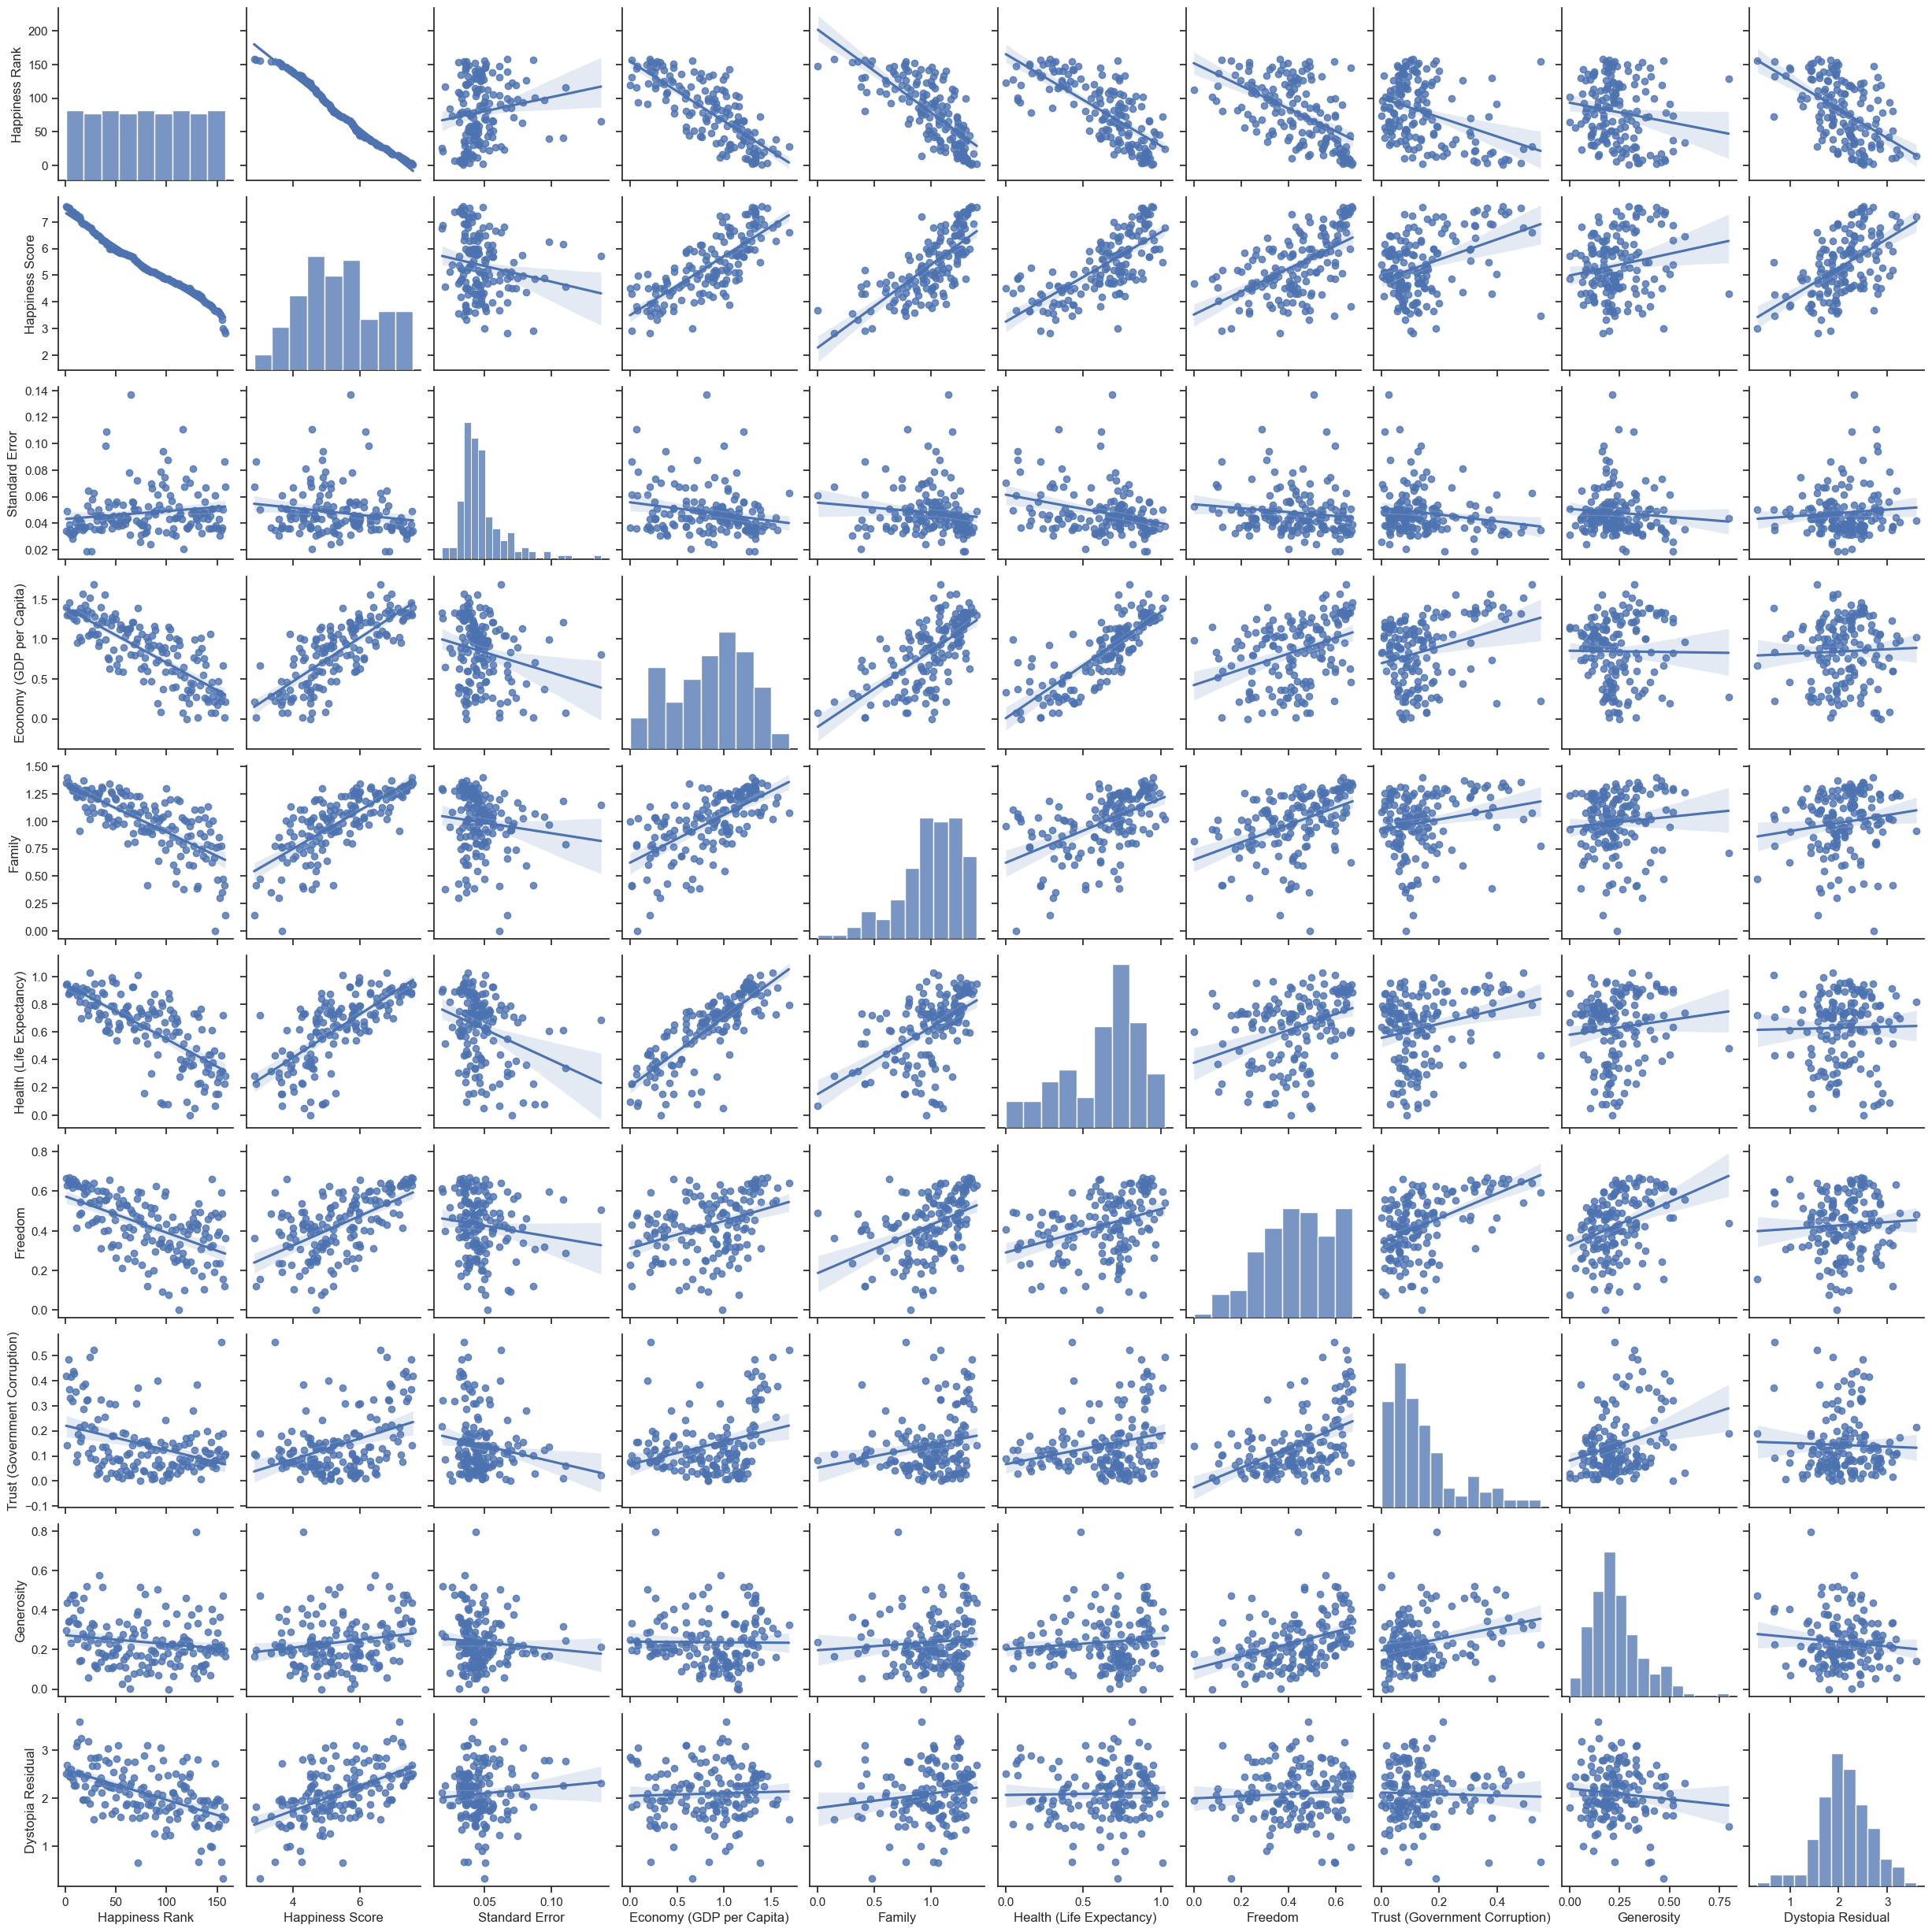

In [19]:
#Let's check all columns by pair plot 
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, kind="reg")

Scatterplots show possible associations or relationships between two variables. I wanted to see each variable positive and negative relationships, uphill lines are showing positive, downhill lines are negative relationships. In above plots are showing that we have weaker, stronger relationships. To quantify the strength of a linear (straight) relationship, we will use a correlation analysis

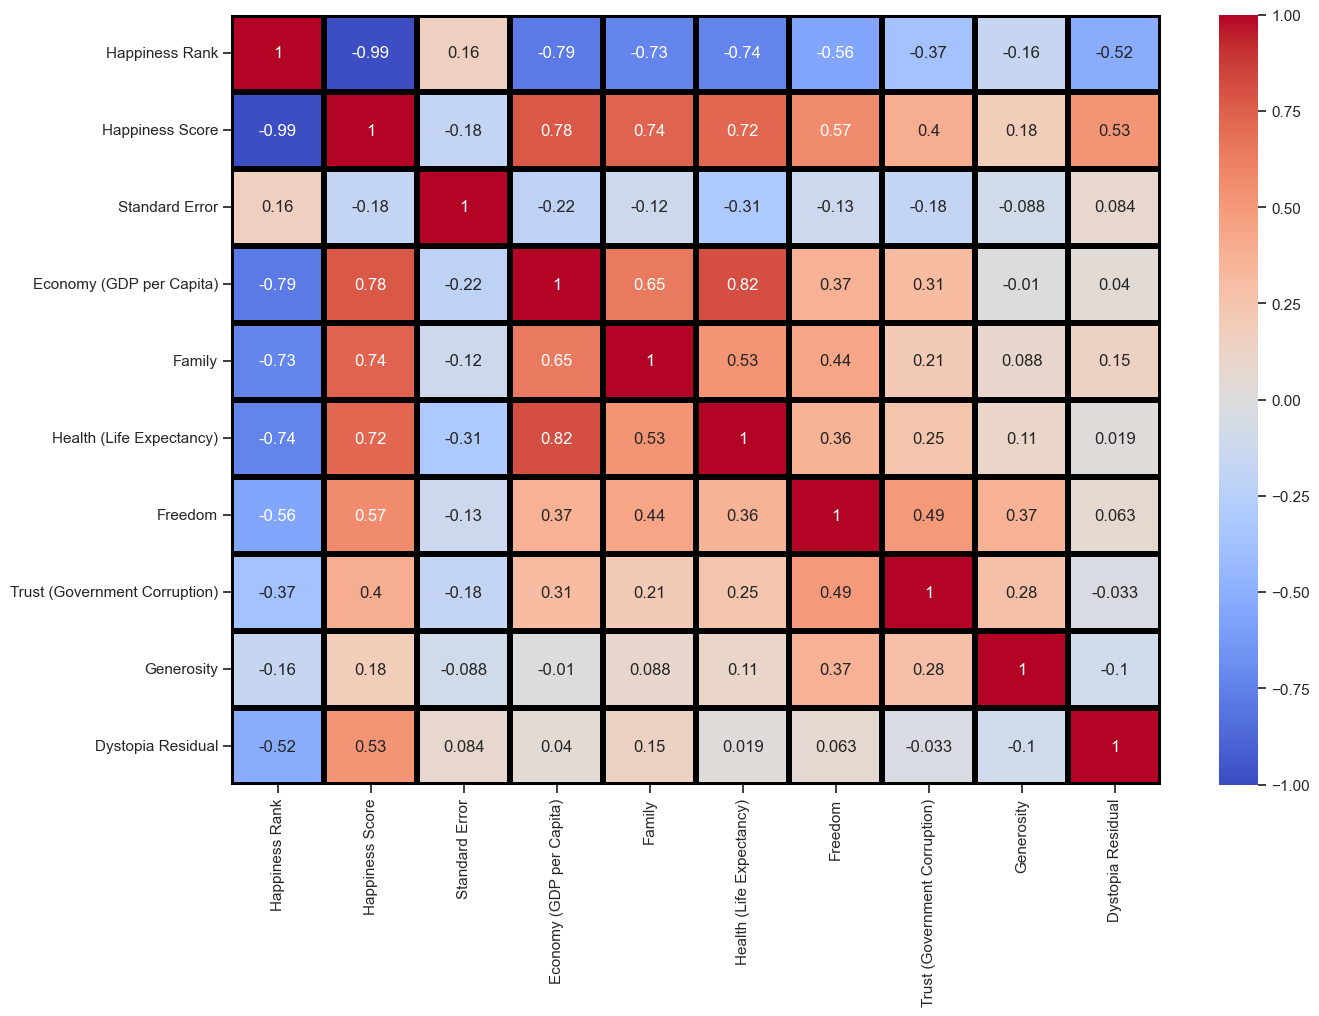

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Clean the DataFrame to contain only numeric values
df_numeric = df.select_dtypes(include='number').fillna(0)  # Drop non-numeric columns and fill NaN values with 0

plt.figure(figsize=(15, 10))
sns.heatmap(df_numeric.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=3, linecolor='black')
plt.show()


Above graphs are showing us how is the correlation between each variable, we will concentrate the highly correlated variables. Happiness Rank and Happiness Score have negative correlation, while Happiness Score is increasing, Ranking is going to decrease (1 is the top, 155 is the last ranking). Therefore, we will analyze Happiness Score relations with GDP, Life Expectations, Freedom and Trust to Government Corruption as these values are highly correlated to each other. GDP is the main factor which is effecting others as Family, Life Expectations and Freedom.

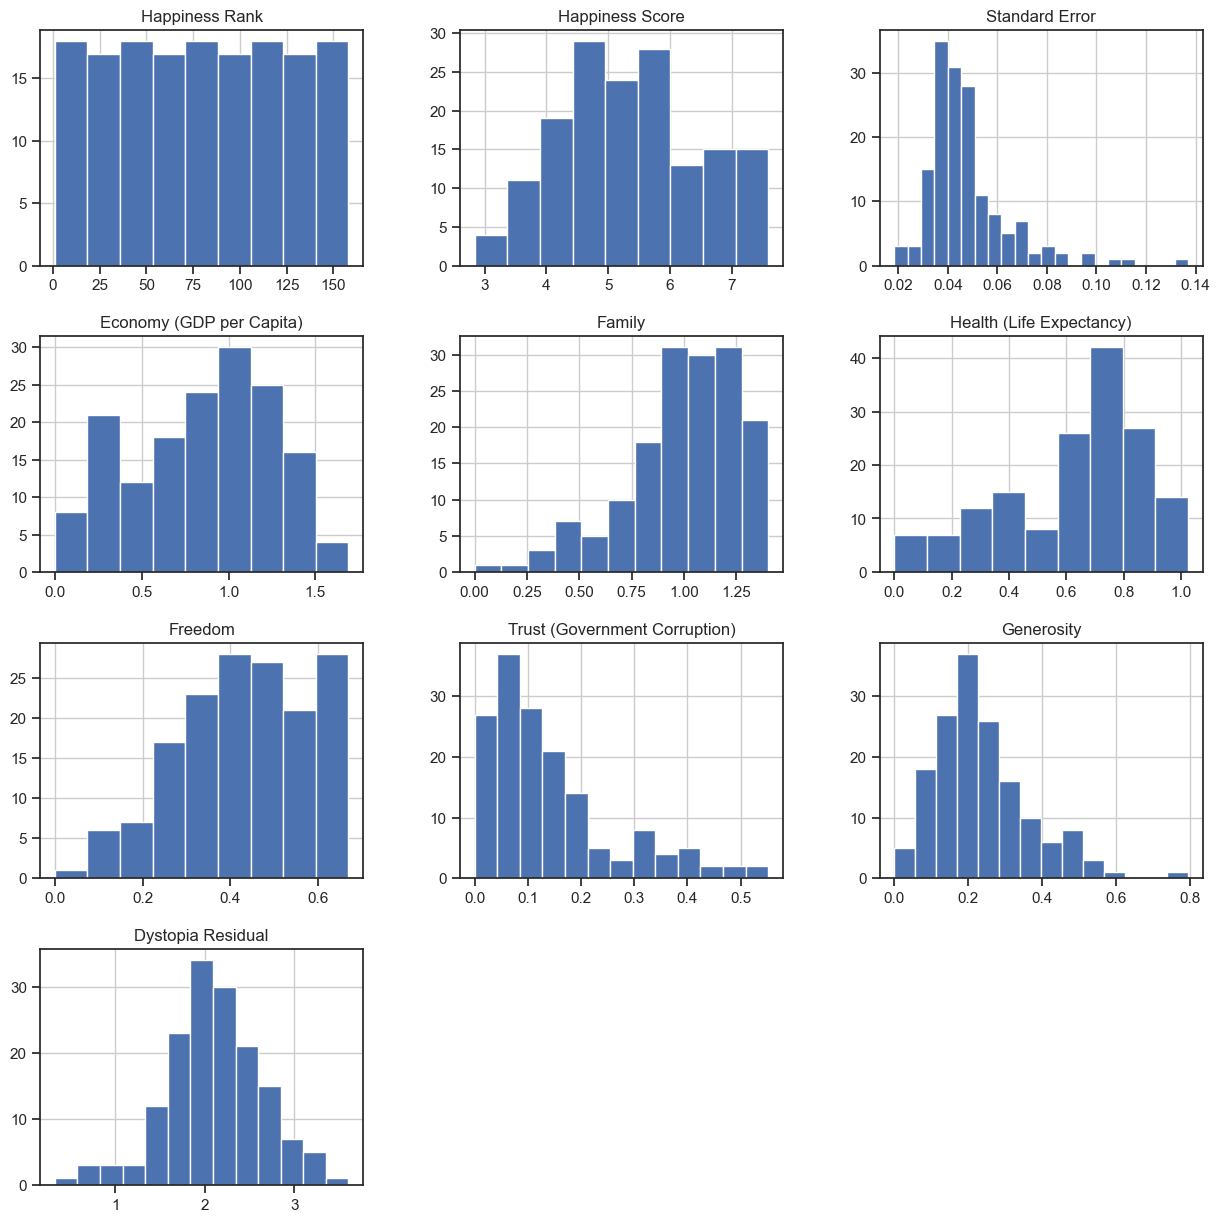

In [21]:
# checking the frequency distribution of the variables

df.hist(bins='auto', figsize=(15,15));

Histograms were used to view the frequency distribution of the variables.

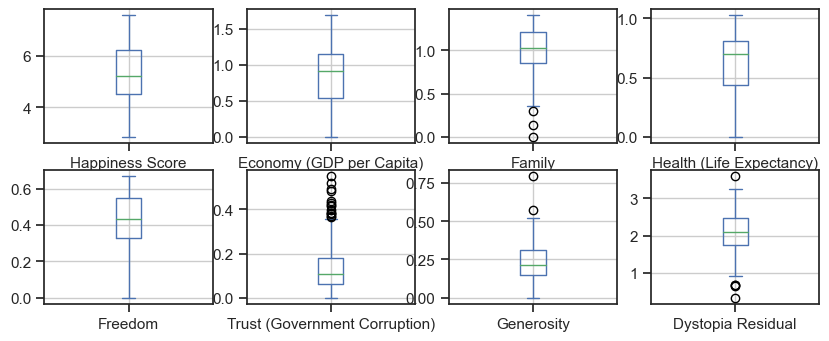

In [22]:
df[['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity','Dystopia Residual']].plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8), grid=True);

Outliers were checked for using boxplots. The output shows there are outliers in the GDP per capita, Generosity, and  Dystopia Residual

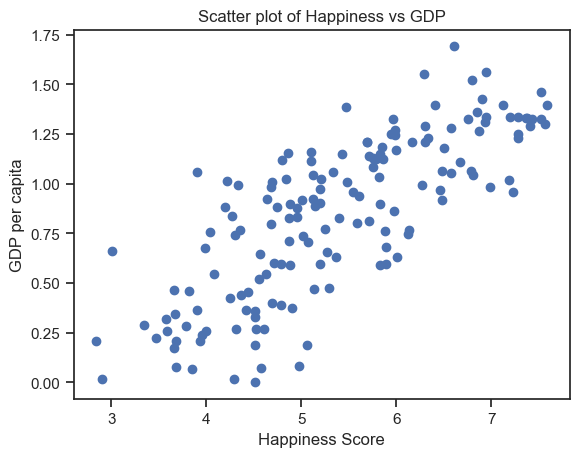

In [23]:
# lets's further investigate the relationship between happiness score and GDP

happiness_score = df['Happiness Score']
gdp= df['Economy (GDP per Capita)']

plt.scatter(happiness_score, gdp)
plt.title('Scatter plot of Happiness vs GDP')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')
plt.show()

the output shows that the richer countries are happier.

In [24]:
# What countries have the highest GDP per capita over the years?
rich_countries = df[['Country', 'Economy (GDP per Capita)']].groupby('Country').mean().sort_values(by='Economy (GDP per Capita)', ascending=False)
rich_countries.head()

,Economy (GDP per Capita)
Country,
Qatar,1.69042
Luxembourg,1.56391
Kuwait,1.55422
Singapore,1.52186
Norway,1.45900


In [25]:
# Some of the saddest countries on average
sad_countries = df[['Country', 'Happiness Rank']].groupby('Country').mean().sort_values(by = 'Happiness Rank', ascending = True)
sad_countries.tail()

,Happiness Rank
Country,
Rwanda,154.0
Benin,155.0
Syria,156.0
Burundi,157.0
Togo,158.0


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


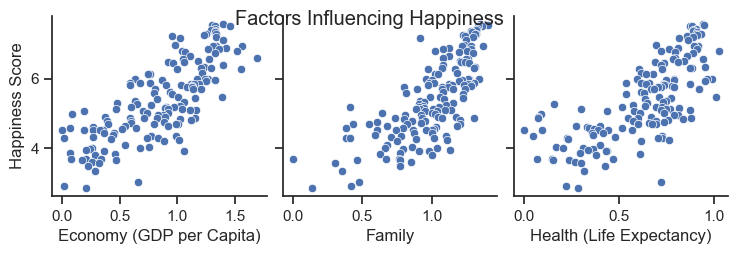

In [26]:
# This pair plot allows us to examine the relationships between key factors (GDP per Capita, Family, Health) and Happiness Score.
# Each point in the scatter plots represents a country, and the patterns can reveal insights into which factors contribute most to overall happiness.

sns.pairplot(df, x_vars=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)'], y_vars=['Happiness Score'], kind='scatter')
plt.suptitle('Factors Influencing Happiness')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


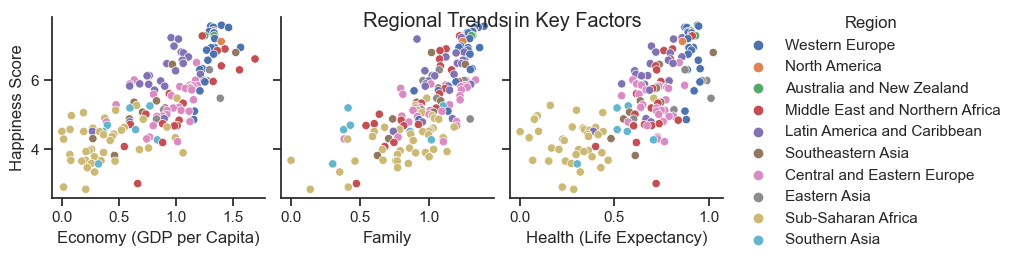

In [27]:
# We use a pair plot to explore the relationships between GDP per Capita, Family, and Health within each region.
# This can provide insights into how these factors vary across different regions.

sns.pairplot(df, hue='Region', x_vars=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)'], y_vars=['Happiness Score'], kind='scatter')
plt.suptitle('Regional Trends in Key Factors')
plt.show()

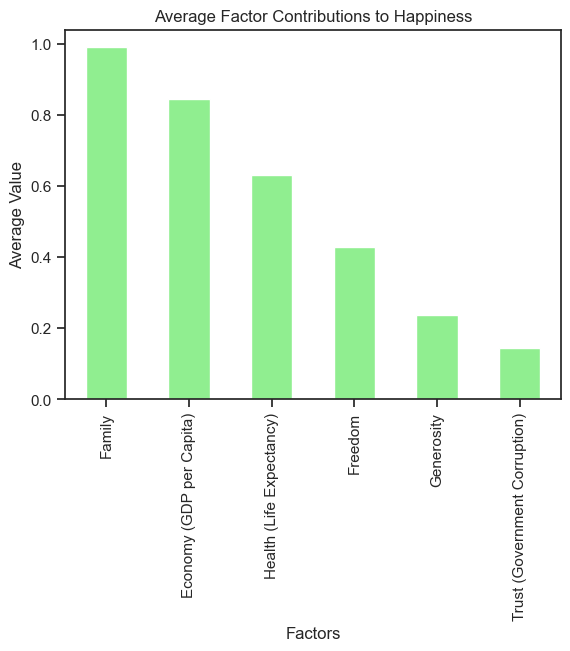

In [28]:
# We quantify the contributions of different factors (e.g., GDP, Family, Health) to overall Happiness Scores.
# The bar plot visualizes the average contributions of each factor.

factor_columns = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
factor_contributions = df[factor_columns].mean().sort_values(ascending=False)
factor_contributions.plot(kind='bar', color='lightgreen')
plt.title('Average Factor Contributions to Happiness')
plt.xlabel('Factors')
plt.ylabel('Average Value')
plt.show()

# Modeling and Prediction

In [29]:
# We consider building a predictive model using a simple linear regression to forecast Happiness Scores.
# The model's performance is evaluated using Mean Squared Error, and the scatter plot visualizes predicted vs. actual values.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [30]:
# Select relevant features
features = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
# Prepare data
X = df[features]
y = df['Happiness Score']

In [31]:
X

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [32]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [33]:
# Handle missing values using SimpleImputer for both features and target variable
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).flatten()


In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 

# Assuming df is your DataFrame

# Clean the DataFrame to contain only numeric values
df_numeric = df.select_dtypes(include='number').fillna(0)  # Drop non-numeric columns and fill NaN values with 0

# Scale the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Now scaled_data contains your scaled numeric data


In [35]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

In [36]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# Make predictions
y_pred = model.predict(X_test)

In [38]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.24193882833563768


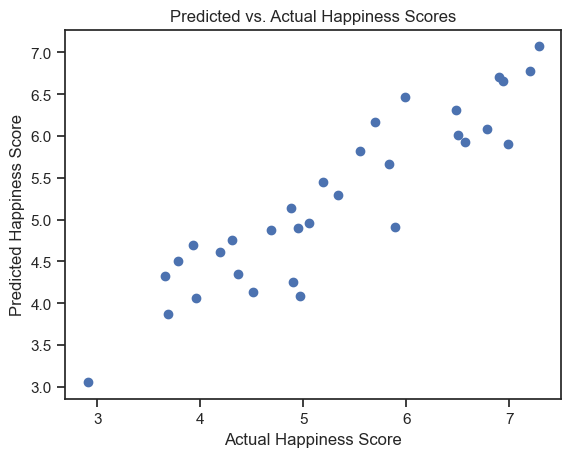

In [39]:
# Visualize predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.title('Predicted vs. Actual Happiness Scores')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.show()

In [40]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE


print('Root Mean Squared Error:', np.sqrt(MSE(y_test, y_pred)))

Root Mean Squared Error: 0.4918727765750384


The model has an RSME score of ~0.49. The lower the RMSE, the better the model is at making predictions

In [44]:
X_sample=[1.39651,1.34951,0.94143,0.66557,0.41978,0.29678]
#changing input data to numpy array
num_data=np.asarray(X_sample)
#reshape the array
input_reshape=num_data.reshape(1,-1)
# Predict on the sample data
predictions = model.predict(input_reshape)

# Print or use the predictions as needed
print(predictions)


[7.16865911]
